# Import Libraries

In [1]:
import numpy as np
import pandas as pd

# Import Data

In [2]:
loan_data_preprocessed_backup = pd.read_csv('loan_data_2015.csv')

/Users/Hooni/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (19,55) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
loan_data_preprocessed_backup.shape

(421094, 74)

# Explore Data

In [4]:
loan_data_preprocessed = loan_data_preprocessed_backup.copy()

In [5]:
loan_data_preprocessed.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

In [6]:
loan_data_preprocessed.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,68444620,73334399,35000,35000,35000.0,60 months,11.99,778.38,C,C1,...,35367.0,49.3,0.0,1.0,5020.0,40.1,52200.0,1.0,4.0,0.0
1,68547583,73437441,8650,8650,8650.0,36 months,5.32,260.50,A,A1,...,24041.0,88.8,0.0,3.0,3081.0,57.9,26800.0,1.0,0.0,5.0
2,67849662,72708407,4225,4225,4225.0,36 months,14.85,146.16,C,C5,...,3830.0,21.9,0.0,0.0,367.0,22.4,4300.0,0.0,0.0,0.0
3,68506885,73396712,10000,10000,10000.0,60 months,11.99,222.40,C,C1,...,35354.0,75.5,1.0,1.0,3118.0,67.4,14200.0,1.0,1.0,1.0
4,68341763,72928789,20000,20000,20000.0,60 months,10.78,432.66,B,B4,...,10827.0,72.8,0.0,2.0,2081.0,64.7,14000.0,2.0,5.0,1.0


In [7]:
loan_data_preprocessed.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
421089,36371250,39102635,10000,10000,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN
421090,36441262,39152692,24000,24000,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN
421091,36271333,38982739,13000,13000,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN
421092,36490806,39222577,12000,12000,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN
421093,36271262,38982659,20000,20000,20000.0,36 months,11.99,664.20,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,41700.0,NaN,NaN,NaN


## General Preprocessing

### Preprocessing few continuous variables

In [8]:
loan_data_preprocessed['emp_length'].unique()

array(['10+ years', '< 1 year', '5 years', '3 years', '4 years', nan,
       '2 years', '8 years', '9 years', '1 year', '6 years', '7 years'],
      dtype=object)

In [9]:
loan_data_preprocessed['emp_length_int'] = loan_data_preprocessed['emp_length'].str.replace('\+ years', '')
loan_data_preprocessed['emp_length_int'] = loan_data_preprocessed['emp_length_int'].str.replace('< 1 year', str(0))
loan_data_preprocessed['emp_length_int'] = loan_data_preprocessed['emp_length_int'].str.replace('n/a',  str(0))
loan_data_preprocessed['emp_length_int'] = loan_data_preprocessed['emp_length_int'].str.replace(' years', '')
loan_data_preprocessed['emp_length_int'] = loan_data_preprocessed['emp_length_int'].str.replace(' year', '')

<ipython-input-9-489a3fd58aae>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  loan_data_preprocessed['emp_length_int'] = loan_data_preprocessed['emp_length'].str.replace('\+ years', '')


In [10]:
type(loan_data_preprocessed['emp_length_int'][0])

str

In [11]:
loan_data_preprocessed['emp_length_int'] = pd.to_numeric(loan_data_preprocessed['emp_length_int'])

In [12]:
loan_data_preprocessed['emp_length_int'].value_counts()

10.0    141520
2.0      37497
0.0      34340
3.0      33430
1.0      27473
5.0      24930
4.0      24506
8.0      21560
7.0      18414
6.0      16838
9.0      16769
Name: emp_length_int, dtype: int64

In [13]:
loan_data_preprocessed['earliest_cr_line']

0         Feb-90
1         Jul-01
2         Jul-11
3         Dec-98
4         Aug-00
           ...  
421089    Sep-04
421090    Mar-74
421091    Sep-03
421092    Oct-03
421093    Dec-01
Name: earliest_cr_line, Length: 421094, dtype: object

In [14]:
loan_data_preprocessed['earliest_cr_line_date'] = pd.to_datetime(loan_data_preprocessed['earliest_cr_line'], format = '%b-%y')

In [15]:
type(loan_data_preprocessed['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
pd.to_datetime('2017-12-01') - loan_data_preprocessed['earliest_cr_line_date']

0        10165 days
1         5997 days
2         2345 days
3         6940 days
4         6331 days
            ...    
421089    4839 days
421090   15981 days
421091    5205 days
421092    5175 days
421093    5844 days
Name: earliest_cr_line_date, Length: 421094, dtype: timedelta64[ns]

In [17]:
loan_data_preprocessed['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2018-12-01') - loan_data_preprocessed['earliest_cr_line_date']) / np.timedelta64(1, 'M')))

In [18]:
loan_data_preprocessed['mths_since_earliest_cr_line'].describe()

count    421094.000000
mean        239.354876
std          98.123989
min        -600.000000
25%         179.000000
50%         224.000000
75%         289.000000
max         599.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [19]:
loan_data_preprocessed.loc[: , ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][loan_data_preprocessed['mths_since_earliest_cr_line'] < 0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
254,Jan-57,2057-01-01,-457.0
618,Aug-64,2064-08-01,-548.0
648,Jul-68,2068-07-01,-595.0
1808,Jan-65,2065-01-01,-553.0
2583,Sep-64,2064-09-01,-549.0
...,...,...,...
418890,Jun-68,2068-06-01,-594.0
420450,Jan-66,2066-01-01,-565.0
420642,Sep-68,2068-09-01,-597.0
420794,Sep-65,2065-09-01,-561.0


In [20]:
loan_data_preprocessed['mths_since_earliest_cr_line'][loan_data_preprocessed['mths_since_earliest_cr_line'] < 0] = loan_data_preprocessed['mths_since_earliest_cr_line'].max()

<ipython-input-20-63883f6169d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_preprocessed['mths_since_earliest_cr_line'][loan_data_preprocessed['mths_since_earliest_cr_line'] < 0] = loan_data_preprocessed['mths_since_earliest_cr_line'].max()


In [21]:
min(loan_data_preprocessed['mths_since_earliest_cr_line'])

73.0

### Homework

In [22]:
loan_data_preprocessed['term']

0          60 months
1          36 months
2          36 months
3          60 months
4          60 months
             ...    
421089     36 months
421090     36 months
421091     60 months
421092     60 months
421093     36 months
Name: term, Length: 421094, dtype: object

In [23]:
loan_data_preprocessed['term'].describe()

count         421094
unique             2
top        36 months
freq          283172
Name: term, dtype: object

In [24]:
loan_data_preprocessed['term_int'] = pd.to_numeric(loan_data_preprocessed['term'].str.replace(' months', ''))
loan_data_preprocessed['term_int']

0         60
1         36
2         36
3         60
4         60
          ..
421089    36
421090    36
421091    60
421092    60
421093    36
Name: term_int, Length: 421094, dtype: int64

In [25]:
type(loan_data_preprocessed['term_int'][0])

numpy.int64

In [26]:
loan_data_preprocessed['issue_d']

0         Dec-15
1         Dec-15
2         Dec-15
3         Dec-15
4         Dec-15
           ...  
421089    Jan-15
421090    Jan-15
421091    Jan-15
421092    Jan-15
421093    Jan-15
Name: issue_d, Length: 421094, dtype: object

In [27]:
loan_data_preprocessed['issue_d_date'] = pd.to_datetime(loan_data_preprocessed['issue_d'], format = '%b-%y')
loan_data_preprocessed['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2018-12-01') - loan_data_preprocessed['issue_d_date']) / np.timedelta64(1, 'M')))
loan_data_preprocessed['mths_since_issue_d'].describe()

count    421094.000000
mean         41.044629
std           3.458162
min          36.000000
25%          38.000000
50%          41.000000
75%          44.000000
max          47.000000
Name: mths_since_issue_d, dtype: float64

In [28]:
loan_data_preprocessed['loan_status'].value_counts()

Current               377553
Fully Paid             22984
Issued                  8460
Late (31-120 days)      4691
In Grace Period         3107
Charged Off             2773
Late (16-30 days)       1139
Default                  387
Name: loan_status, dtype: int64

In [29]:
loan_data_preprocessed['good_bad'] = np.where(loan_data_preprocessed['loan_status'].isin(['Charged Off', 'Default',
                                                               'Does not meet the credit policy. Status:Charged Off',
                                                               'Late (31-120 days)']), 0, 1)

In [30]:
loan_data_preprocessed['good_bad'].value_counts()

1    413243
0      7851
Name: good_bad, dtype: int64

### Preprocessing few discrete variables

In [31]:
loan_data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 81 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           421094 non-null  int64         
 1   member_id                    421094 non-null  int64         
 2   loan_amnt                    421094 non-null  int64         
 3   funded_amnt                  421094 non-null  int64         
 4   funded_amnt_inv              421094 non-null  float64       
 5   term                         421094 non-null  object        
 6   int_rate                     421094 non-null  float64       
 7   installment                  421094 non-null  float64       
 8   grade                        421094 non-null  object        
 9   sub_grade                    421094 non-null  object        
 10  emp_title                    397220 non-null  object        
 11  emp_length                

In [32]:
pd.get_dummies(loan_data_preprocessed['grade'], prefix = 'grade', prefix_sep = ':')

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
421089,0,1,0,0,0,0,0
421090,0,1,0,0,0,0,0
421091,0,0,0,1,0,0,0
421092,0,0,0,0,1,0,0


In [33]:
loan_data_preprocessed_dummies = [pd.get_dummies(loan_data_preprocessed['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data_preprocessed['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data_preprocessed['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(loan_data_preprocessed['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data_preprocessed['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data_preprocessed['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(loan_data_preprocessed['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(loan_data_preprocessed['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]

In [34]:
loan_data_preprocessed_dummies = pd.concat(loan_data_preprocessed_dummies, axis = 1)

In [35]:
type(loan_data_preprocessed_dummies)

pandas.core.frame.DataFrame

In [36]:
loan_data_preprocessed.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,earliest_cr_line_date,mths_since_earliest_cr_line,term_int,issue_d_date,mths_since_issue_d,good_bad
0,68444620,73334399,35000,35000,35000.0,60 months,11.99,778.38,C,C1,...,1.0,4.0,0.0,10.0,1990-02-01,346.0,60,2015-12-01,36.0,1
1,68547583,73437441,8650,8650,8650.0,36 months,5.32,260.50,A,A1,...,1.0,0.0,5.0,0.0,2001-07-01,209.0,36,2015-12-01,36.0,1
2,67849662,72708407,4225,4225,4225.0,36 months,14.85,146.16,C,C5,...,0.0,0.0,0.0,5.0,2011-07-01,89.0,36,2015-12-01,36.0,1
3,68506885,73396712,10000,10000,10000.0,60 months,11.99,222.40,C,C1,...,1.0,1.0,1.0,10.0,1998-12-01,240.0,60,2015-12-01,36.0,1
4,68341763,72928789,20000,20000,20000.0,60 months,10.78,432.66,B,B4,...,2.0,5.0,1.0,10.0,2000-08-01,220.0,60,2015-12-01,36.0,1


In [37]:
loan_data_preprocessed_dummies.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
loan_data_preprocessed = pd.concat([loan_data_preprocessed, loan_data_preprocessed_dummies], axis = 1)

In [39]:
loan_data_preprocessed.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

In [40]:
loan_data_preprocessed['loan_status'].value_counts()

Current               377553
Fully Paid             22984
Issued                  8460
Late (31-120 days)      4691
In Grace Period         3107
Charged Off             2773
Late (16-30 days)       1139
Default                  387
Name: loan_status, dtype: int64

In [41]:
#--loan_data_defaults = loan_data_preprocessed[loan_data_preprocessed['loan_status'].isin(['Charged Off',
#--                                                                                       'Does not meet the credit policy. Status:Charged Off'])]

In [42]:
loan_data_preprocessed['recoveries'].describe()

count    421094.000000
mean          2.263264
std         111.428440
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       26308.470000
Name: recoveries, dtype: float64

In [43]:
loan_data_preprocessed.shape

(421094, 203)

In [44]:
pd.options.display.max_rows = None

In [45]:
len(loan_data_preprocessed.columns)

203

In [46]:
loan_data_preprocessed.isnull().sum()

id                                          0
member_id                                   0
loan_amnt                                   0
funded_amnt                                 0
funded_amnt_inv                             0
term                                        0
int_rate                                    0
installment                                 0
grade                                       0
sub_grade                                   0
emp_title                               23874
emp_length                              23817
home_ownership                              0
annual_inc                                  0
verification_status                         0
issue_d                                     0
loan_status                                 0
pymnt_plan                                  0
url                                         0
desc                                   421049
purpose                                     0
title                             

In [47]:
pd.options.display.max_rows = None

In [48]:
loan_data_preprocessed['total_rev_hi_lim'].fillna(loan_data_preprocessed['funded_amnt'], inplace = True)

In [49]:
loan_data_preprocessed['total_rev_hi_lim'].isnull().sum()

0

### Homework

In [50]:
loan_data_preprocessed['annual_inc'].fillna(loan_data_preprocessed['annual_inc'].mean(), inplace=True)

In [51]:
loan_data_preprocessed['mths_since_earliest_cr_line'].fillna(0, inplace=True)
loan_data_preprocessed['acc_now_delinq'].fillna(0, inplace=True)
loan_data_preprocessed['total_acc'].fillna(0, inplace=True)
loan_data_preprocessed['pub_rec'].fillna(0, inplace=True)
loan_data_preprocessed['open_acc'].fillna(0, inplace=True)
loan_data_preprocessed['inq_last_6mths'].fillna(0, inplace=True)
loan_data_preprocessed['delinq_2yrs'].fillna(0, inplace=True)
loan_data_preprocessed['emp_length_int'].fillna(0, inplace=True)

# Independent Variables

In [52]:
loan_data_preprocessed['mths_since_last_delinq'].fillna(0, inplace = True)

In [53]:
loan_data_preprocessed['mths_since_last_record'].fillna(0, inplace = True)

In [54]:
#--loan_data_defaults.loc[:,'emp_length_int'].fillna(0, inplace = True)

In [55]:
#--for i in range(len(loan_data_defaults.columns)):
#--    loan_data_defaults.iloc[:, i].fillna(0, inplace=True)

In [56]:
loan_data_preprocessed[loan_data_preprocessed['emp_title'].isnull()].head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
9,68377020,73266845,15000,15000,15000.0,36 months,5.32,451.73,A,A1,...,0,0,1,0,0,0,0,0,0,1
10,68366663,73256496,24000,24000,24000.0,60 months,9.80,507.58,B,B3,...,0,0,0,0,0,0,0,0,0,1
107,68416953,73306779,1500,1500,1500.0,36 months,6.49,45.97,A,A2,...,0,0,0,0,0,0,0,0,0,1
153,68516545,73406354,25000,25000,25000.0,36 months,7.49,777.55,A,A4,...,0,0,0,0,0,0,0,0,0,1
158,68192805,73060538,8000,8000,8000.0,36 months,17.97,289.10,D,D4,...,0,0,0,0,0,0,0,0,0,1


In [57]:
loan_data_preprocessed['emp_title'].fillna(0, inplace = True)

In [58]:
loan_data_preprocessed[loan_data_preprocessed['emp_title'].notnull()]['emp_title'].head()

0    Foreign Service Officer
1       Associate Consultant
2                   mechanic
3        CARDIOVASCULAR TECH
4               truck driver
Name: emp_title, dtype: object

# Dependent Variables

In [59]:
loan_data_preprocessed['recovery_rate'] = loan_data_preprocessed['recoveries'] / loan_data_preprocessed['funded_amnt']

In [60]:
loan_data_preprocessed.loc[loan_data_preprocessed['recovery_rate']>0,'id'].count()

306

In [61]:
loan_data_preprocessed['recovery_rate'].describe()

count    421094.000000
mean          0.000147
std           0.006717
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.218959
Name: recovery_rate, dtype: float64

In [62]:
loan_data_preprocessed['recovery_rate'] = np.where(loan_data_preprocessed['recovery_rate'] > 1, 1, loan_data_preprocessed['recovery_rate'])
loan_data_preprocessed['recovery_rate'] = np.where(loan_data_preprocessed['recovery_rate'] < 0, 0, loan_data_preprocessed['recovery_rate'])

In [63]:
loan_data_preprocessed['recovery_rate'].describe()

count    421094.000000
mean          0.000146
std           0.006573
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: recovery_rate, dtype: float64

In [64]:
loan_data_preprocessed['CCF'] = (loan_data_preprocessed['funded_amnt'] - loan_data_preprocessed['total_rec_prncp']) / loan_data_preprocessed['funded_amnt']

In [65]:
loan_data_preprocessed['CCF'].describe()

count    421094.000000
mean          0.838658
std           0.219487
min           0.000000
25%           0.819318
50%           0.900575
75%           0.952633
max           1.000000
Name: CCF, dtype: float64

In [66]:
#--loan_data_preprocessed.to_csv('loan_data_defaults_homework.csv')

# Explore Dependent Variables

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

(array([4.20793e+05, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.00000e+00, 3.90000e+01, 1.27000e+02, 6.70000e+01, 1.10000e+01,
        2.20000e+01, 1.20000e+01, 1.00000e+00, 2.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

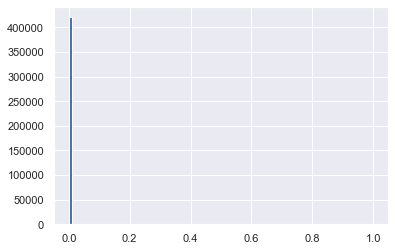

In [68]:
plt.hist(loan_data_preprocessed['recovery_rate'], bins = 100)

(array([2.2866e+04, 2.5000e+01, 2.3000e+01, 3.3000e+01, 2.6000e+01,
        2.2000e+01, 2.6000e+01, 3.2000e+01, 3.1000e+01, 3.2000e+01,
        2.7000e+01, 1.9000e+01, 2.5000e+01, 1.9000e+01, 2.4000e+01,
        2.4000e+01, 2.7000e+01, 3.1000e+01, 2.0000e+01, 2.5000e+01,
        2.7000e+01, 2.5000e+01, 3.0000e+01, 2.0000e+01, 3.2000e+01,
        3.1000e+01, 3.6000e+01, 3.0000e+01, 2.7000e+01, 3.9000e+01,
        3.3000e+01, 2.8000e+01, 3.8000e+01, 2.5000e+01, 3.8000e+01,
        3.7000e+01, 3.8000e+01, 2.3000e+01, 4.2000e+01, 4.2000e+01,
        4.2000e+01, 3.4000e+01, 2.8000e+01, 3.6000e+01, 3.4000e+01,
        4.5000e+01, 5.3000e+01, 5.0000e+01, 4.9000e+01, 5.0000e+01,
        5.4000e+01, 5.8000e+01, 4.8000e+01, 6.1000e+01, 6.0000e+01,
        6.4000e+01, 6.7000e+01, 7.9000e+01, 7.3000e+01, 9.3000e+01,
        5.7000e+01, 9.4000e+01, 8.4000e+01, 9.9000e+01, 1.1200e+02,
        1.4100e+02, 1.2700e+02, 1.5200e+02, 1.6040e+03, 2.9390e+03,
        3.5930e+03, 7.1540e+03, 4.3850e+03, 5.53

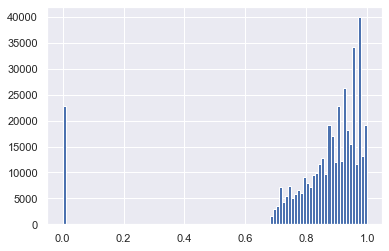

In [69]:
plt.hist(loan_data_preprocessed['CCF'], bins = 100)

In [70]:
loan_data_preprocessed.loc[:,'recovery_rate_0_1'] = np.where(loan_data_preprocessed['recovery_rate'] == 0, 0, 1)

In [71]:
loan_data_preprocessed['recovery_rate_0_1'].value_counts()

0    420788
1       306
Name: recovery_rate_0_1, dtype: int64

# LGD Model

### Splitting Data

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
loan_data_preprocessed['loan_status'].value_counts()

Current               377553
Fully Paid             22984
Issued                  8460
Late (31-120 days)      4691
In Grace Period         3107
Charged Off             2773
Late (16-30 days)       1139
Default                  387
Name: loan_status, dtype: int64

In [164]:
loan_data_defaults = loan_data_preprocessed[loan_data_preprocessed['loan_status'].isin(['Default','Charged Off'])]

In [165]:
lgd_inputs_stage_1_train, lgd_inputs_stage_1_test, lgd_targets_stage_1_train, lgd_targets_stage_1_test = train_test_split(loan_data_defaults.drop(['recovery_rate', 'recovery_rate_0_1', 'CCF'], axis = 1), loan_data_defaults['recovery_rate_0_1'], test_size = 0.5, random_state = 42)

In [166]:
lgd_inputs_stage_1_train['loan_status'].value_counts()

Charged Off    1393
Default         187
Name: loan_status, dtype: int64

In [167]:
lgd_targets_stage_1_test.value_counts()

0    1421
1     159
Name: recovery_rate_0_1, dtype: int64

### Preparing the Inputs

In [168]:
features_all = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:MORTGAGE',
'home_ownership:NONE',
'home_ownership:OTHER',
'home_ownership:OWN',
'home_ownership:RENT',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:car',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:educational',
'purpose:home_improvement',
'purpose:house',
'purpose:major_purchase',
'purpose:medical',
'purpose:moving',
'purpose:other',
'purpose:renewable_energy',
'purpose:small_business',
'purpose:vacation',
'purpose:wedding',
'initial_list_status:f',
'initial_list_status:w',
'term_int',
'emp_length_int',
'mths_since_issue_d',
'mths_since_earliest_cr_line',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'delinq_2yrs',
'inq_last_6mths',
'mths_since_last_delinq',
'mths_since_last_record',
'open_acc',
'pub_rec',
'total_acc',
'acc_now_delinq',
'total_rev_hi_lim']

In [169]:
features_reference_cat = ['grade:G',
#'home_ownership:NONE',
'home_ownership:RENT',
'verification_status:Verified',
'purpose:credit_card',
#'purpose:wedding',
'initial_list_status:f']

In [170]:
if ['home_ownership:NONE'] in lgd_inputs_stage_1_train.columns.values:
    pass
else:
    lgd_inputs_stage_1_train['home_ownership:NONE'] = 0

In [171]:
if ['home_ownership:OTHER'] in lgd_inputs_stage_1_train.columns.values:
    pass
else:
    lgd_inputs_stage_1_train['home_ownership:OTHER'] = 0

In [172]:
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train[features_all]

In [173]:
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train.drop(features_reference_cat, axis = 1)

In [174]:
lgd_inputs_stage_1_train.isnull().sum()

grade:A                                0
grade:B                                0
grade:C                                0
grade:D                                0
grade:E                                0
grade:F                                0
home_ownership:MORTGAGE                0
home_ownership:NONE                    0
home_ownership:OTHER                   0
home_ownership:OWN                     0
verification_status:Not Verified       0
verification_status:Source Verified    0
purpose:car                            0
purpose:debt_consolidation             0
purpose:educational                    0
purpose:home_improvement               0
purpose:house                          0
purpose:major_purchase                 0
purpose:medical                        0
purpose:moving                         0
purpose:other                          0
purpose:renewable_energy               0
purpose:small_business                 0
purpose:vacation                       0
purpose:wedding 

In [175]:
lgd_inputs_stage_1_train.shape

(1580, 44)

In [176]:
lgd_targets_stage_1_train.shape

(1580,)

## Estimating the Model

### Add below statements to give a weighted probability to the default account due to low sample size
### References :  5.5.2 Oversampling and Up/Down Weighting (p.264)

In [177]:
default_wt=1/np.mean(lgd_targets_stage_1_train==1)/2

In [178]:
wt=[default_wt if outcome==1 else 1 for outcome in lgd_targets_stage_1_train]

In [179]:
from sklearn import linear_model
import scipy.stats as stat
import scipy as sc

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs,solver='lbfgs',max_iter=10000)
#        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y,wt):
        self.model.fit(X,y,sample_weight=wt)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
#--     It is to use np.linalg.pinv function instead of np.linalg.inv 
#--     to prevent LinAlgError due to the Singular matrix
#--     Cramer_Rao = np.linalg.inv(F_ij)
        Cramer_Rao = sc.linalg.pinv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [180]:
reg_lgd_st_1 = LogisticRegression_with_p_values()
reg_lgd_st_1.fit(lgd_inputs_stage_1_train, lgd_targets_stage_1_train, wt)

<ipython-input-179-56ed35e80754>:20: RuntimeWarning: invalid value encountered in sqrt
  sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))


In [181]:
feature_name = lgd_inputs_stage_1_train.columns.values

In [182]:
reg_lgd_st_1.intercept_

array([-0.00011831])

In [183]:
reg_lgd_st_1.p_values[0:5]

[0.999950784486866,
 0.999981608503739,
 0.99994519551804,
 0.9996909816079699,
 0.9997361796852057]

In [184]:
reg_lgd_st_1.coef_[0][0:5]

array([-5.26157374e-05, -1.63198453e-05,  4.18743235e-05, -1.96062632e-04,
        1.45820688e-04])

In [185]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st_1.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st_1.intercept_[0]]
summary_table = summary_table.sort_index()
p_values = reg_lgd_st_1.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.183083e-04,NaN
1,grade:A,-5.261574e-05,0.999951
2,grade:B,-1.631985e-05,0.999982
3,grade:C,4.187432e-05,0.999945
4,grade:D,-1.960626e-04,0.999691
5,grade:E,1.458207e-04,0.999736
6,grade:F,-2.017468e-05,0.999960
7,home_ownership:MORTGAGE,-3.142189e-05,0.999798
8,home_ownership:NONE,0.000000e+00,1.000000
9,home_ownership:OTHER,0.000000e+00,NaN


### Testing the Model

In [186]:
if ['home_ownership:NONE'] in lgd_inputs_stage_1_test.columns.values:
    pass
else:
    lgd_inputs_stage_1_test['home_ownership:NONE'] = 0

In [187]:
if ['home_ownership:OTHER'] in lgd_inputs_stage_1_test.columns.values:
    pass
else:
    lgd_inputs_stage_1_test['home_ownership:OTHER'] = 0

In [188]:
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test[features_all]

In [189]:
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test.drop(features_reference_cat, axis = 1)

In [190]:
y_hat_test_lgd_stage_1 = reg_lgd_st_1.model.predict(lgd_inputs_stage_1_test)

In [191]:
y_hat_test_lgd_stage_1

array([0, 0, 0, ..., 0, 0, 0])

In [192]:
y_hat_test_proba_lgd_stage_1 = reg_lgd_st_1.model.predict_proba(lgd_inputs_stage_1_test)

In [193]:
y_hat_test_proba_lgd_stage_1

array([[0.74007633, 0.25992367],
       [0.61478306, 0.38521694],
       [0.73939909, 0.26060091],
       ...,
       [0.7058075 , 0.2941925 ],
       [0.65872215, 0.34127785],
       [0.72308026, 0.27691974]])

In [194]:
y_hat_test_proba_lgd_stage_1 = y_hat_test_proba_lgd_stage_1[: ][: , 1]

In [195]:
y_hat_test_proba_lgd_stage_1

array([0.25992367, 0.38521694, 0.26060091, ..., 0.2941925 , 0.34127785,
       0.27691974])

In [196]:
lgd_targets_stage_1_test_temp = lgd_targets_stage_1_test

In [197]:
lgd_targets_stage_1_test_temp.reset_index(drop = True, inplace = True)

In [198]:
lgd_targets_stage_1_test_temp.head()

0    0
1    0
2    0
3    0
4    0
Name: recovery_rate_0_1, dtype: int64

In [199]:
df_actual_predicted_probs = pd.concat([lgd_targets_stage_1_test_temp, pd.DataFrame(y_hat_test_proba_lgd_stage_1)], axis = 1)

In [200]:
df_actual_predicted_probs.columns = ['lgd_targets_stage_1_test', 'y_hat_test_proba_lgd_stage_1']

In [201]:
df_actual_predicted_probs.index = lgd_inputs_stage_1_test.index

In [202]:
lgd_inputs_stage_1_test[:5]

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,...,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,acc_now_delinq,total_rev_hi_lim
397908,0,1,0,0,0,0,0,0,0,0,...,34.25,1.0,1.0,4.0,0.0,15.0,0.0,24.0,0.0,33000.0
399526,1,0,0,0,0,0,0,0,0,0,...,14.67,0.0,0.0,0.0,59.0,12.0,1.0,37.0,0.0,15800.0
333893,0,0,0,1,0,0,0,0,0,0,...,37.56,0.0,1.0,33.0,63.0,18.0,1.0,42.0,0.0,52000.0
352560,0,0,1,0,0,0,1,0,0,0,...,21.11,0.0,0.0,39.0,0.0,10.0,0.0,26.0,0.0,83500.0
421086,0,0,0,0,1,0,0,0,0,1,...,29.44,0.0,1.0,65.0,0.0,9.0,0.0,20.0,0.0,16800.0


### Estimating the Аccuracy of the Мodel

In [263]:
tr = 0.38
df_actual_predicted_probs['y_hat_test_lgd_stage_1'] = np.where(df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'] > tr, 1, 0)

In [264]:
df_actual_predicted_probs.head()

,lgd_targets_stage_1_test,y_hat_test_proba_lgd_stage_1,y_hat_test_lgd_stage_1
397908,0,0.259924,0
399526,0,0.385217,1
333893,0,0.260601,0
352560,0,0.245686,0
421086,0,0.317809,0


In [265]:
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,934,487
1,96,63


In [266]:
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.591139,0.308228
1,0.060759,0.039873


In [267]:
df_actual_predicted_probs.shape

(1580, 3)

In [268]:
(pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.6310126582278481

In [269]:
from sklearn.metrics import roc_curve, roc_auc_score

In [270]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])

Text(0.5, 1.0, 'ROC curve')

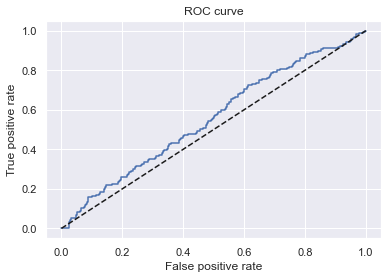

In [271]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [272]:
AUROC = roc_auc_score(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])
AUROC

0.554264646652415

### Saving the Model

In [127]:
import pickle

In [128]:
pickle.dump(reg_lgd_st_1, open('lgd_model_stage_1.sav', 'wb'))

### Stage 2 – Linear Regression

In [129]:
lgd_stage_2_data = loan_data_defaults[loan_data_defaults['recovery_rate_0_1'] == 1]

In [130]:
lgd_inputs_stage_2_train, lgd_inputs_stage_2_test, lgd_targets_stage_2_train, lgd_targets_stage_2_test = train_test_split(lgd_stage_2_data.drop(['good_bad', 'recovery_rate', 'recovery_rate_0_1', 'CCF'], axis = 1), lgd_stage_2_data['recovery_rate'], test_size = 0.2, random_state = 42)

In [131]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [132]:
import scipy.stats as stat

class LinearRegression(linear_model.LinearRegression):
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True, n_jobs=1, positive=False):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs
        self.positive = positive
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.pinv(np.dot(X.T, X))))])
#--        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])
        self.t = self.coef_ / se
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self

In [133]:
if ['home_ownership:NONE'] in lgd_inputs_stage_2_train.columns.values:
    pass
else:
    lgd_inputs_stage_2_train['home_ownership:NONE'] = 0

In [134]:
if ['home_ownership:OTHER'] in lgd_inputs_stage_2_train.columns.values:
    pass
else:
    lgd_inputs_stage_2_train['home_ownership:OTHER'] = 0

In [135]:
lgd_inputs_stage_2_train = lgd_inputs_stage_2_train[features_all]

In [136]:
lgd_inputs_stage_2_train = lgd_inputs_stage_2_train.drop(features_reference_cat, axis = 1)

In [137]:
reg_lgd_st_2 = LinearRegression()

In [138]:
reg_lgd_st_2.fit(lgd_inputs_stage_2_train, lgd_targets_stage_2_train)

<ipython-input-132-5b710ed7e75e>:13: RuntimeWarning: invalid value encountered in sqrt
  se = np.array([np.sqrt(np.diagonal(sse * np.linalg.pinv(np.dot(X.T, X))))])


LinearRegression()

In [139]:
feature_name = lgd_inputs_stage_2_train.columns.values

In [140]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st_2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st_2.intercept_]
summary_table = summary_table.sort_index()
p_values = reg_lgd_st_2.p
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values.round(3)
summary_table

,Feature name,Coefficients,p_values
0,Intercept,1.123826e+00,NaN
1,grade:A,1.042228e+00,0.000
2,grade:B,2.286740e-01,0.031
3,grade:C,1.615554e-01,0.070
4,grade:D,1.531009e-01,0.040
5,grade:E,1.026576e-01,0.084
6,grade:F,6.342771e-02,0.210
7,home_ownership:MORTGAGE,-2.664655e-02,0.100
8,home_ownership:NONE,-7.042977e-16,NaN
9,home_ownership:OTHER,9.783840e-16,0.995


### Stage 2 – Linear Regression Evaluation

In [141]:
if ['home_ownership:NONE'] in lgd_inputs_stage_2_test.columns.values:
    pass
else:
    lgd_inputs_stage_2_test['home_ownership:NONE'] = 0

In [142]:
if ['home_ownership:OTHER'] in lgd_inputs_stage_2_test.columns.values:
    pass
else:
    lgd_inputs_stage_2_test['home_ownership:OTHER'] = 0

In [143]:
lgd_inputs_stage_2_test = lgd_inputs_stage_2_test[features_all]

In [144]:
lgd_inputs_stage_2_test = lgd_inputs_stage_2_test.drop(features_reference_cat, axis = 1)

In [145]:
lgd_inputs_stage_2_test.columns.values

array(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:MORTGAGE', 'home_ownership:NONE',
       'home_ownership:OTHER', 'home_ownership:OWN',
       'verification_status:Not Verified',
       'verification_status:Source Verified', 'purpose:car',
       'purpose:debt_consolidation', 'purpose:educational',
       'purpose:home_improvement', 'purpose:house',
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_energy',
       'purpose:small_business', 'purpose:vacation', 'purpose:wedding',
       'initial_list_status:w', 'term_int', 'emp_length_int',
       'mths_since_issue_d', 'mths_since_earliest_cr_line', 'funded_amnt',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'total_acc',
       'acc_now_delinq', 'total_rev_hi_lim'], dtype=object)

In [146]:
y_hat_test_lgd_stage_2 = reg_lgd_st_2.predict(lgd_inputs_stage_2_test)

In [147]:
lgd_targets_stage_2_test_temp = lgd_targets_stage_2_test

In [148]:
lgd_targets_stage_2_test_temp

401181    0.179045
392727    0.168418
378830    0.194057
404722    0.167494
359803    0.206318
315213    0.217670
382210    0.176584
393089    0.162931
398167    0.179405
343082    0.177550
298261    0.210700
374519    0.178337
351112    0.174185
399584    0.218011
381878    0.176930
351565    0.206577
384106    0.184697
402669    0.203190
412414    0.196191
389701    1.000000
410284    0.181199
416475    0.179468
412110    0.205615
339514    0.175829
390356    0.183578
408942    0.178672
292129    1.000000
365819    0.176271
417707    0.164548
378784    0.181334
388669    0.208131
417768    0.188996
405336    0.179975
349021    0.210700
329480    0.074167
417494    0.173085
367611    0.184773
371773    0.169637
337663    0.178852
358764    0.945253
372338    0.170801
368012    0.223191
413688    0.179062
381299    0.175874
304053    0.183111
402631    0.174966
417671    0.175406
368140    0.174323
418809    0.187692
410612    0.173712
408905    0.169053
418396    0.182029
360098    0.

In [149]:
lgd_targets_stage_2_test_temp = lgd_targets_stage_2_test_temp.reset_index(drop = True)

In [150]:
pd.concat([lgd_targets_stage_2_test_temp, pd.DataFrame(y_hat_test_lgd_stage_2)], axis = 1).corr()

,recovery_rate,0
recovery_rate,1.00000,0.30672
0,0.30672,1.00000


/Users/Hooni/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='recovery_rate', ylabel='Density'>

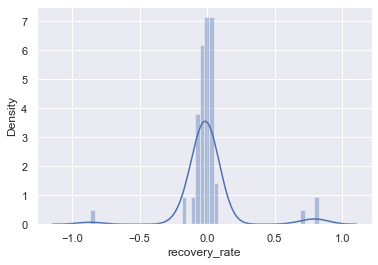

In [151]:
sns.distplot(lgd_targets_stage_2_test - y_hat_test_lgd_stage_2)

In [152]:
pickle.dump(reg_lgd_st_2, open('lgd_model_stage_2_homework.sav', 'wb'))

### Combining Stage 1 and Stage 2

In [153]:
y_hat_test_lgd_stage_2_all = reg_lgd_st_2.predict(lgd_inputs_stage_1_test)

In [154]:
y_hat_test_lgd_stage_2_all

array([0.23511274, 1.01222793, 0.26415108, ..., 0.19061578, 0.1631677 ,
       0.18164391])

In [155]:
y_hat_test_lgd_stage_1.shape

(1580,)

In [156]:
y_hat_test_lgd_stage_2_all.shape

(1580,)

In [157]:
y_hat_test_lgd = y_hat_test_lgd_stage_1 * y_hat_test_lgd_stage_2_all

In [158]:
y_hat_test_lgd

array([0., 0., 0., ..., 0., 0., 0.])

In [159]:
pd.DataFrame(y_hat_test_lgd).describe()

,0
count,1580.000000
mean,0.006794
std,0.043086
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,0.491799


In [160]:
y_hat_test_lgd = np.where(y_hat_test_lgd < 0, 0, y_hat_test_lgd)
y_hat_test_lgd = np.where(y_hat_test_lgd > 1, 1, y_hat_test_lgd)

In [161]:
pd.DataFrame(y_hat_test_lgd).describe()

,0
count,1580.000000
mean,0.006794
std,0.043086
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,0.491799
